In [6]:
import torch 
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean = (0.5,), std = (0.5,)),
                                                     ])
                                 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64,shuffle = True)
                            

0it [00:00, ?it/s]

9920512it [00:02, 4293675.38it/s]                             


Extracting /Users/yujinchung/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 51368.49it/s]                           
0it [00:00, ?it/s]

Extracting /Users/yujinchung/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:02, 722483.06it/s]                             
0it [00:00, ?it/s]

Extracting /Users/yujinchung/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 19428.76it/s]            

Extracting /Users/yujinchung/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [7]:
# Build a feed_forward network 
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))

# Define the loss 
criterion = nn.CrossEntropyLoss()

# Get our daata 
images, labels = next(iter(trainloader))
# flatten images 
images = images.view(images.shape[0], -1)

# Forward pass, get our logits 
logits = model(images)

# Calculate the loss with the logits and the labels 
loss = criterion(logits, labels)

print(loss)

tensor(2.3146, grad_fn=<NllLossBackward>)


### Exercise
Build a model that returns the log-softmax as the output<br>
and calculate the loss using the negative log likelihood loss.<br>
<p>
Not that for nn.LogSoftmax and F.log_softmax you'll need to set the dim keyword argument appropriately.<br>

dim = 0 calculates softmax across the rows, so each column sums to 1.<br>
While dim = 1, calculates across the columns so each row sums to 1. <br>
</p>


In [12]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64), 
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))
# last part, dim should be 1, bcs 10 class prob sum should be 1
# if dim = 0, then 64 units' prob sum get to be 1, which is misleading.


criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps= model(images)
loss = criterion(logps, labels)

print(loss) 

tensor(2.2987, grad_fn=<NllLossBackward>)


# Autograd

In [13]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0.0022, 0.0022, 0.0022,  ..., 0.0022, 0.0022, 0.0022],
        [0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0019, 0.0019, 0.0019,  ..., 0.0019, 0.0019, 0.0019],
        [0.0006, 0.0006, 0.0006,  ..., 0.0006, 0.0006, 0.0006],
        [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009]])


# Training the network!

### Optimizer
> update the weights with the gradients

In [16]:
from torch import optim 
# import optimizer from torch

# Optimizers require the prameters to optimize and a learning rate 
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [18]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this becuase gradients are accumulated
optimizer.zero_grad()
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient - ', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[ 0.0171,  0.0156,  0.0022,  ..., -0.0023, -0.0146, -0.0156],
        [-0.0080, -0.0061, -0.0064,  ...,  0.0347,  0.0309,  0.0080],
        [ 0.0191,  0.0107, -0.0004,  ..., -0.0003, -0.0215,  0.0256],
        ...,
        [-0.0296,  0.0065, -0.0263,  ..., -0.0168,  0.0118,  0.0240],
        [ 0.0355,  0.0002,  0.0175,  ...,  0.0254,  0.0290,  0.0311],
        [-0.0171, -0.0294,  0.0158,  ...,  0.0224,  0.0199, -0.0162]],
       requires_grad=True)
Gradient -  tensor([[ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010]])


In [19]:
# take an updates step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0171,  0.0155,  0.0022,  ..., -0.0023, -0.0146, -0.0157],
        [-0.0080, -0.0061, -0.0064,  ...,  0.0348,  0.0309,  0.0080],
        [ 0.0191,  0.0107, -0.0004,  ..., -0.0003, -0.0215,  0.0256],
        ...,
        [-0.0296,  0.0065, -0.0263,  ..., -0.0168,  0.0118,  0.0240],
        [ 0.0355,  0.0002,  0.0175,  ...,  0.0254,  0.0290,  0.0311],
        [-0.0171, -0.0295,  0.0158,  ...,  0.0224,  0.0199, -0.0162]],
       requires_grad=True)


In [25]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)


# optimizer.zero_grad()
# output = model.forward(images)
# loss = criterion(output, labels)
# loss.backward()
# print('Gradient - ', model[0].weight.grad)


epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # TODO: Training pass
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward() # NEVER FORGET to ADD ()!!!!!!!
        optimizer.step() # I have missed this part 
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        

Training loss: 1.025889269769319
Training loss: 0.38538900854935776
Training loss: 0.32537676274045696
Training loss: 0.29136236226444306
Training loss: 0.2655929716061682


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()


<Figure size 432x288 with 0 Axes>

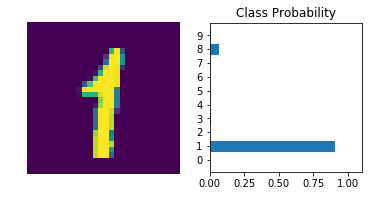

In [30]:
%matplotlib inline 
import helper 

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part 
with torch.no_grad():
    logits = model.forward(img)
    
# Output of the network are logits, need to take softmax for probabilities 
ps = F.softmax(logits, dim = 1)
view_classify(img.view(1,28,28), ps)